In [1]:
# !pip install "zenml[server]"
# !zenml integration install sklearn -y
#%pip install pyparsing==2.4.2
import IPython
IPython.Application.instance().kernel.do_shutdown(restart=True)

{'status': 'ok', 'restart': True}

In [2]:
#FreshML Stack
!rm -rf .zen
!zenml init

NumExpr defaulting to 8 threads.
Setting the repo active workspace to 'default'.
Setting the repo active stack to default.
⠋ Initializing ZenML repository at 
/Users/abhisheksingh/DataspellProjects/mcb2/PROJECT/Housing.
⠙ Initializing ZenML repository at 
/Users/abhisheksingh/DataspellProjects/mcb2/PROJECT/Housing.
⠹ Initializing ZenML repository at 
/Users/abhisheksingh/DataspellProjects/mcb2/PROJECT/Housing.
ZenML repository initialized at 
/Users/abhisheksingh/DataspellProjects/mcb2/PROJECT/Housing.
⠹ Initializing ZenML repository at 
/Users/abhisheksingh/DataspellProjects/mcb2/PROJECT/Housing.
⠹ Initializing ZenML repository at 
/Users/abhisheksingh/DataspellProjects/mcb2/PROJECT/Housing.

The local active stack was initialized to 'default'. This local configuration 
will only take effect when you're running ZenML from the initialized repository 
root, or from a subdirectory. For more information on repositories and 
configurations, please visit 
https://docs.zenml.io/user-guide/st

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
housing=pd.read_csv('train.csv')

In [64]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [66]:
housing.shape

(1460, 81)

In [67]:
housing=housing.drop("Id",axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [68]:
housing.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [69]:
housing.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.55,161.32,0.0,0.00,0.0,0.00,1474.0


In [70]:
housing.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [71]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

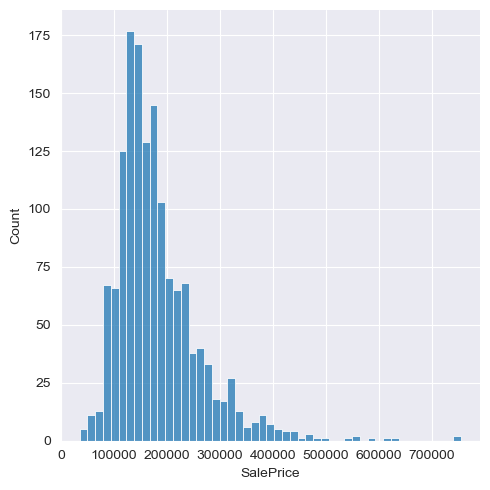

In [72]:
sns.displot((housing['SalePrice']))

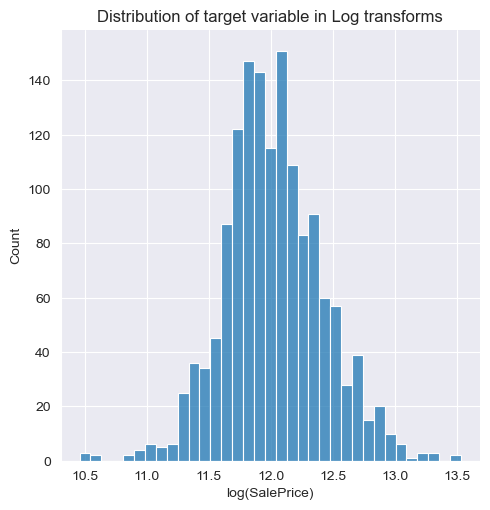

In [73]:
sns.displot(np.log(housing['SalePrice']))
plt.title('Distribution of target variable in Log transforms')
plt.xlabel('log(SalePrice)')
plt.show()

36


/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 1200x1800 with 0 Axes>

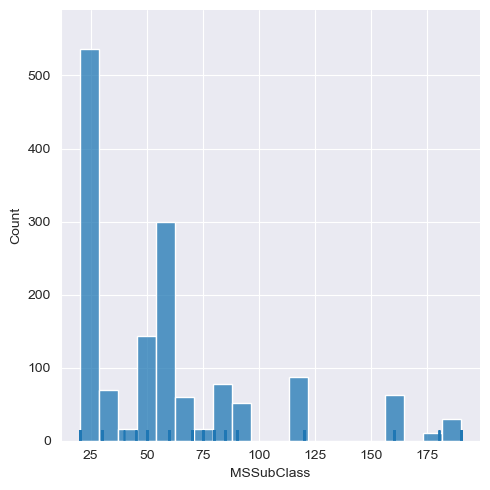

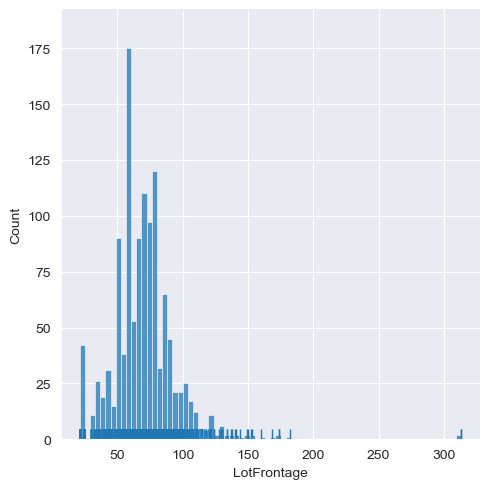

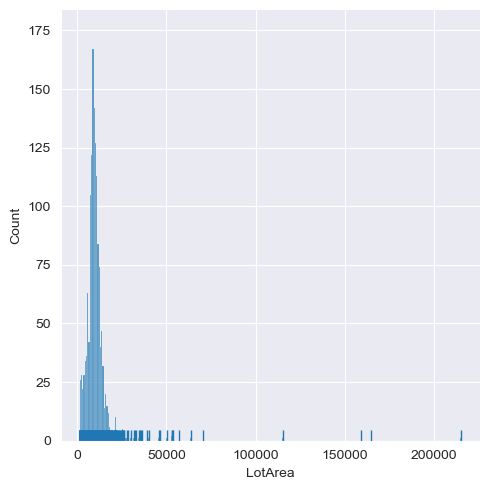

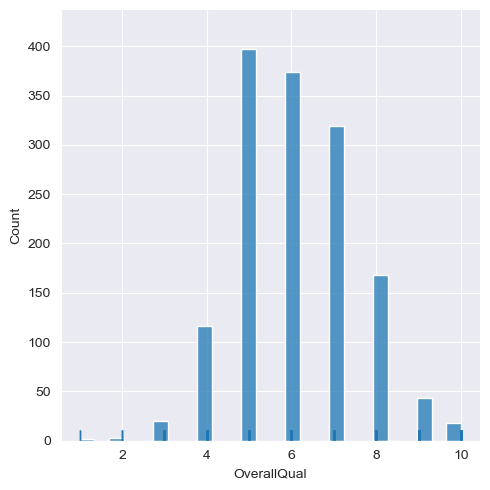

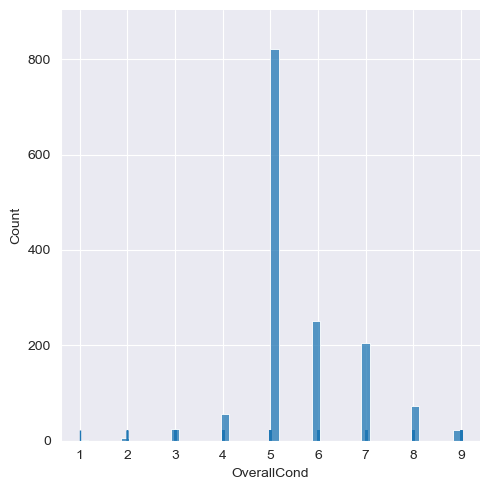

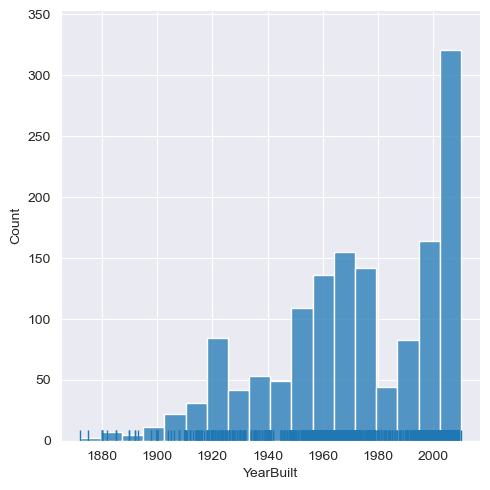

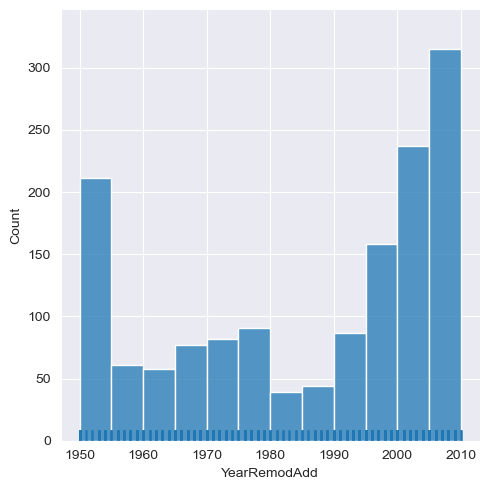

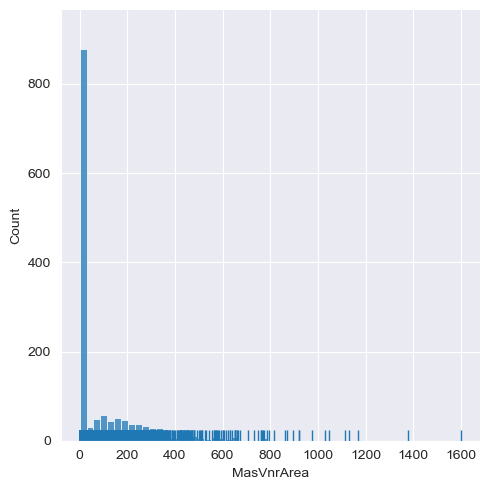

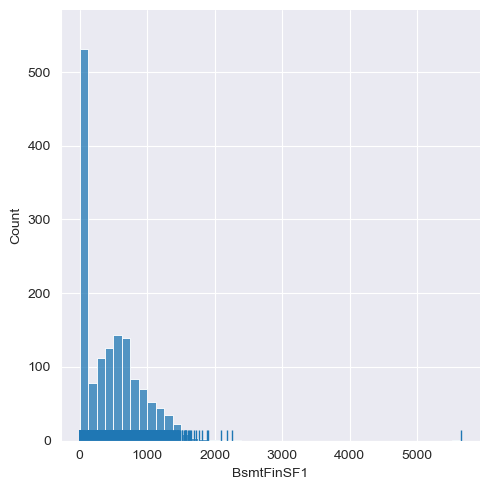

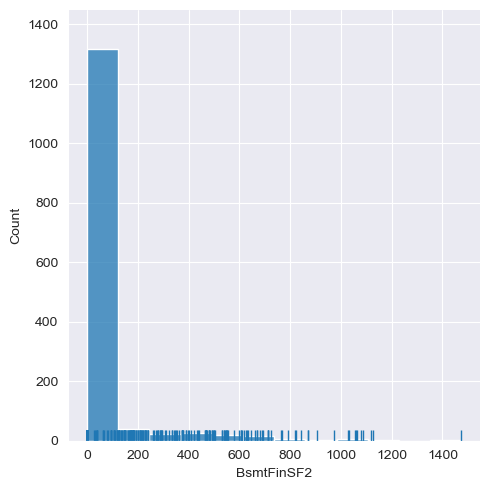

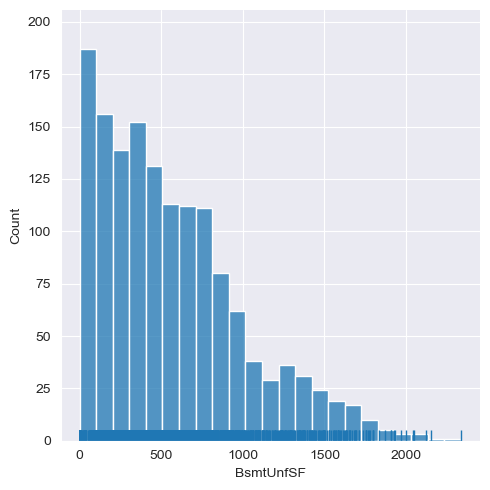

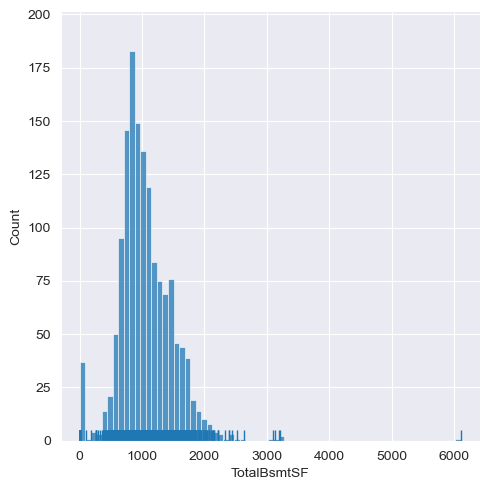

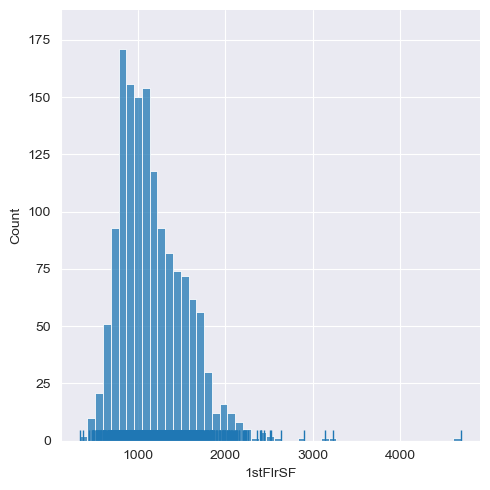

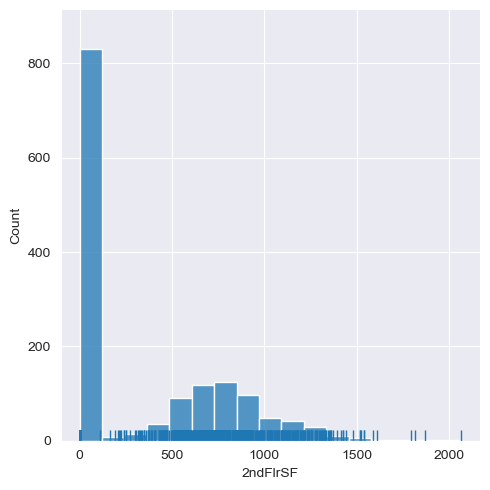

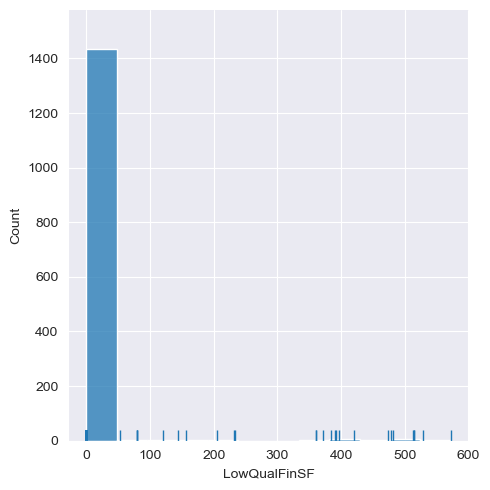

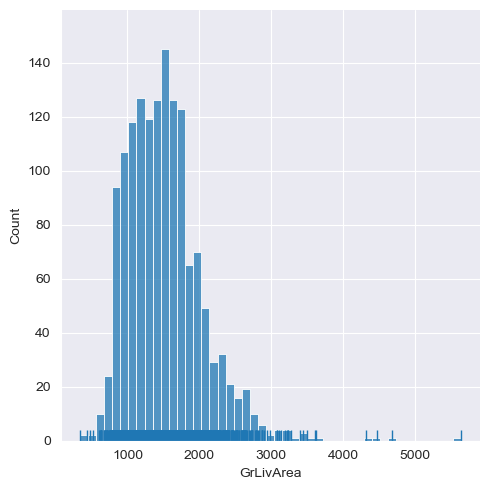

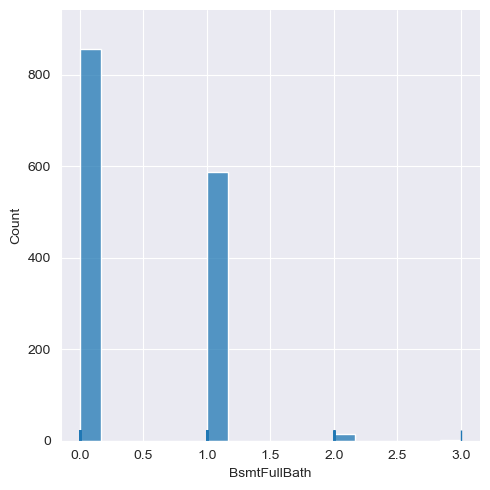

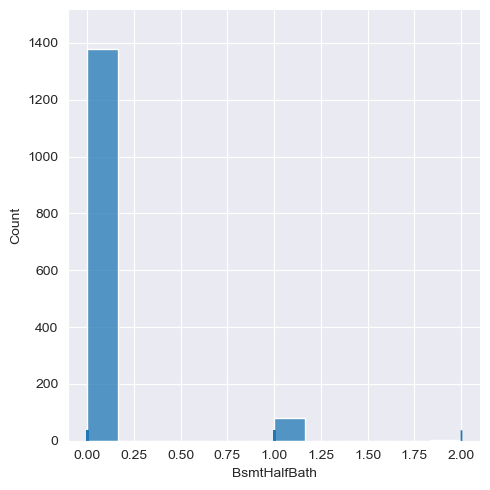

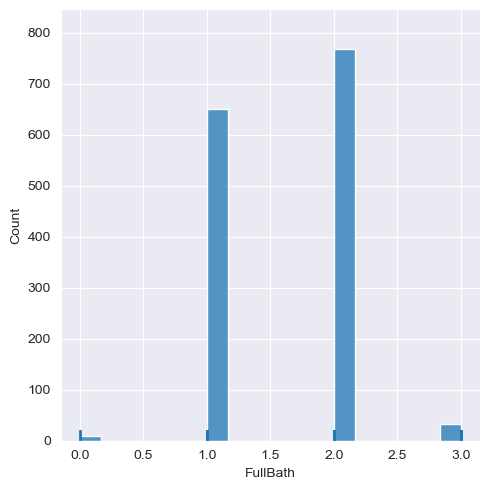

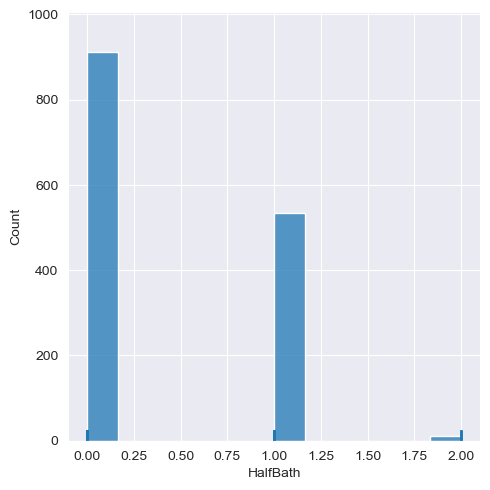

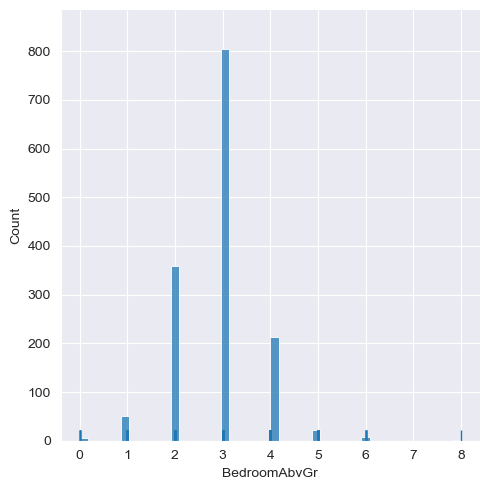

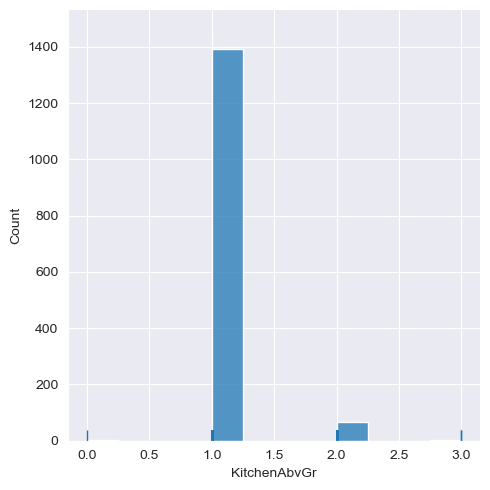

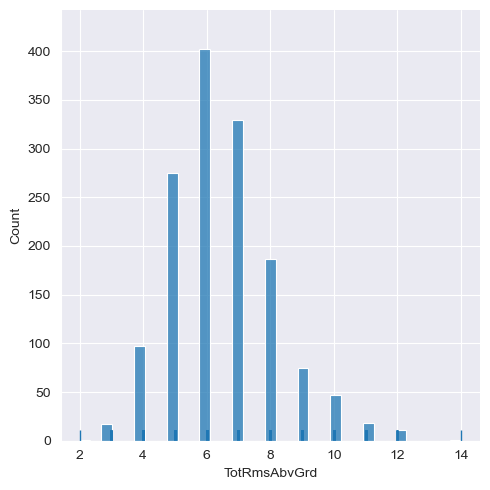

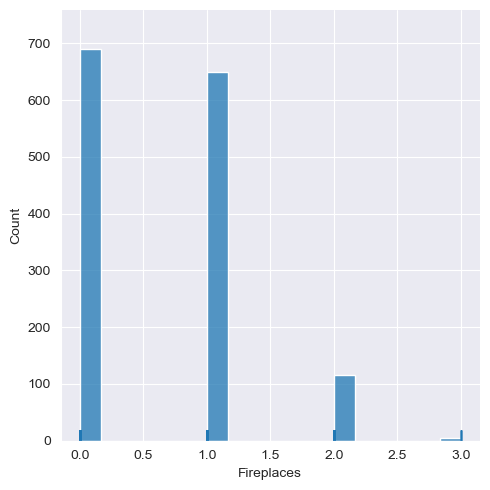

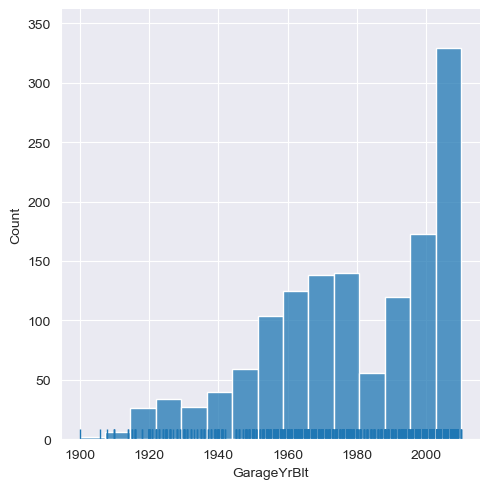

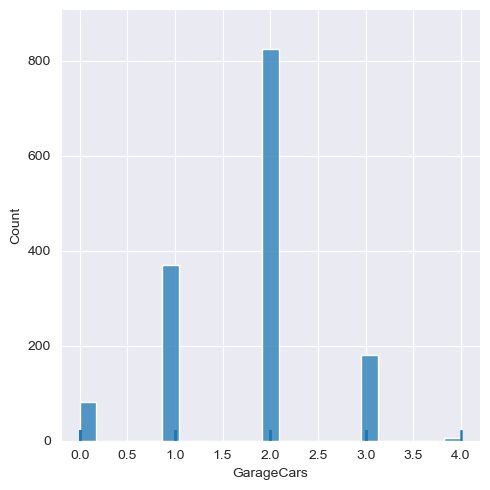

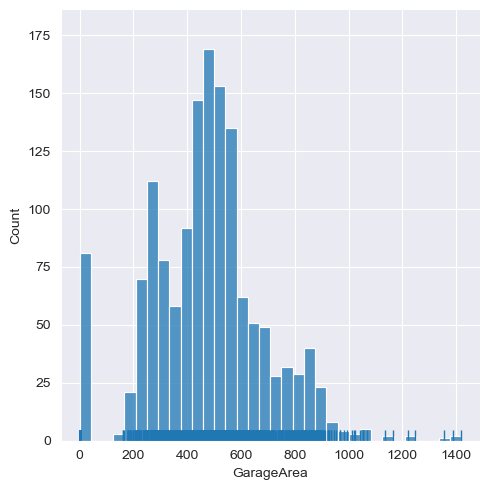

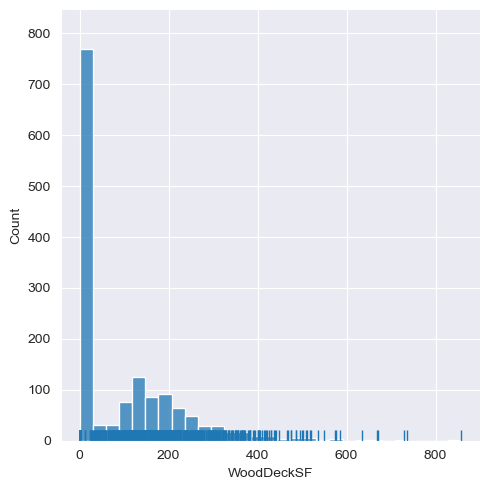

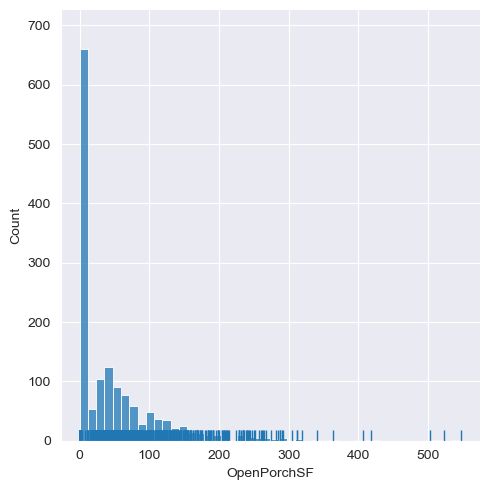

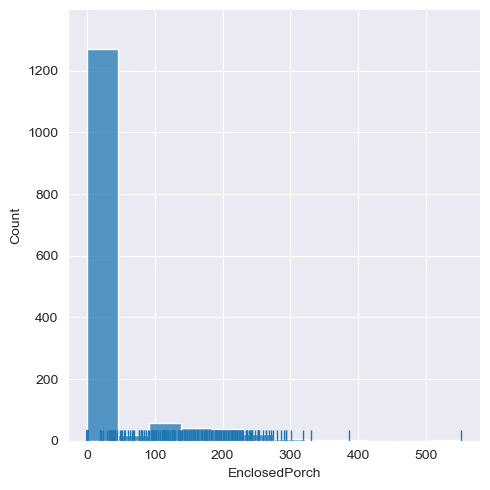

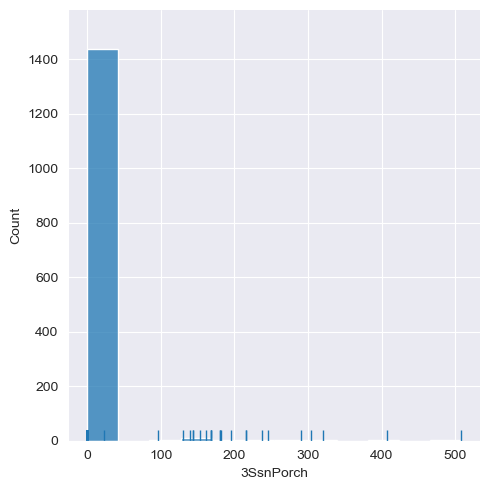

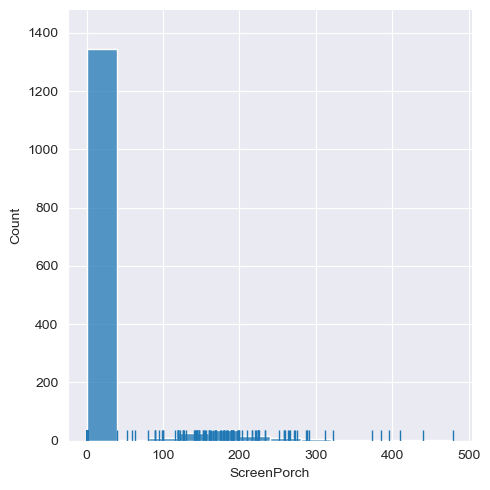

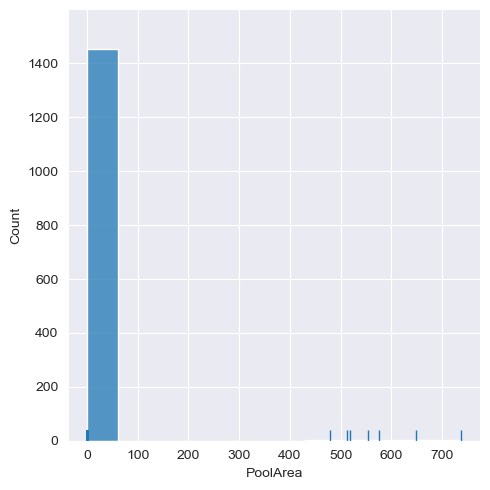

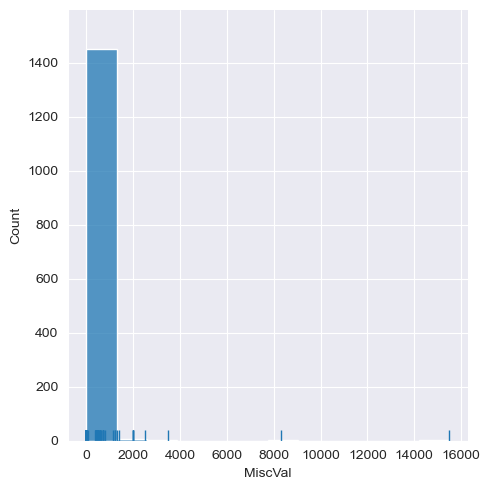

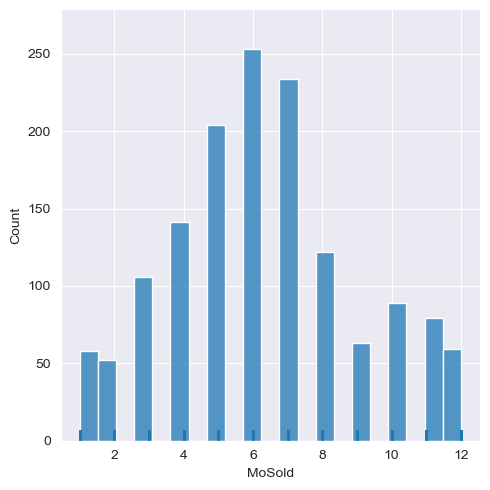

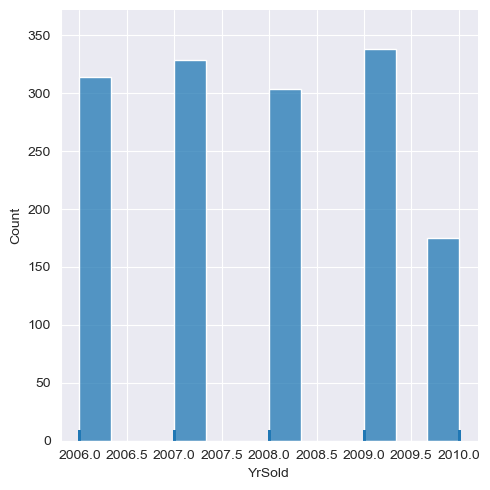

In [74]:
num_attribute=housing.select_dtypes(exclude='object').drop(['SalePrice'],axis=1).copy()
print(len(num_attribute.columns))
fig=plt.figure(figsize=(12,18))
for i in range(len(num_attribute.columns)):
    sns.displot(num_attribute.iloc[:,i].dropna(),rug=True)
    plt.xlabel(num_attribute.columns[i])
plt.tight_layout()
plt.show()

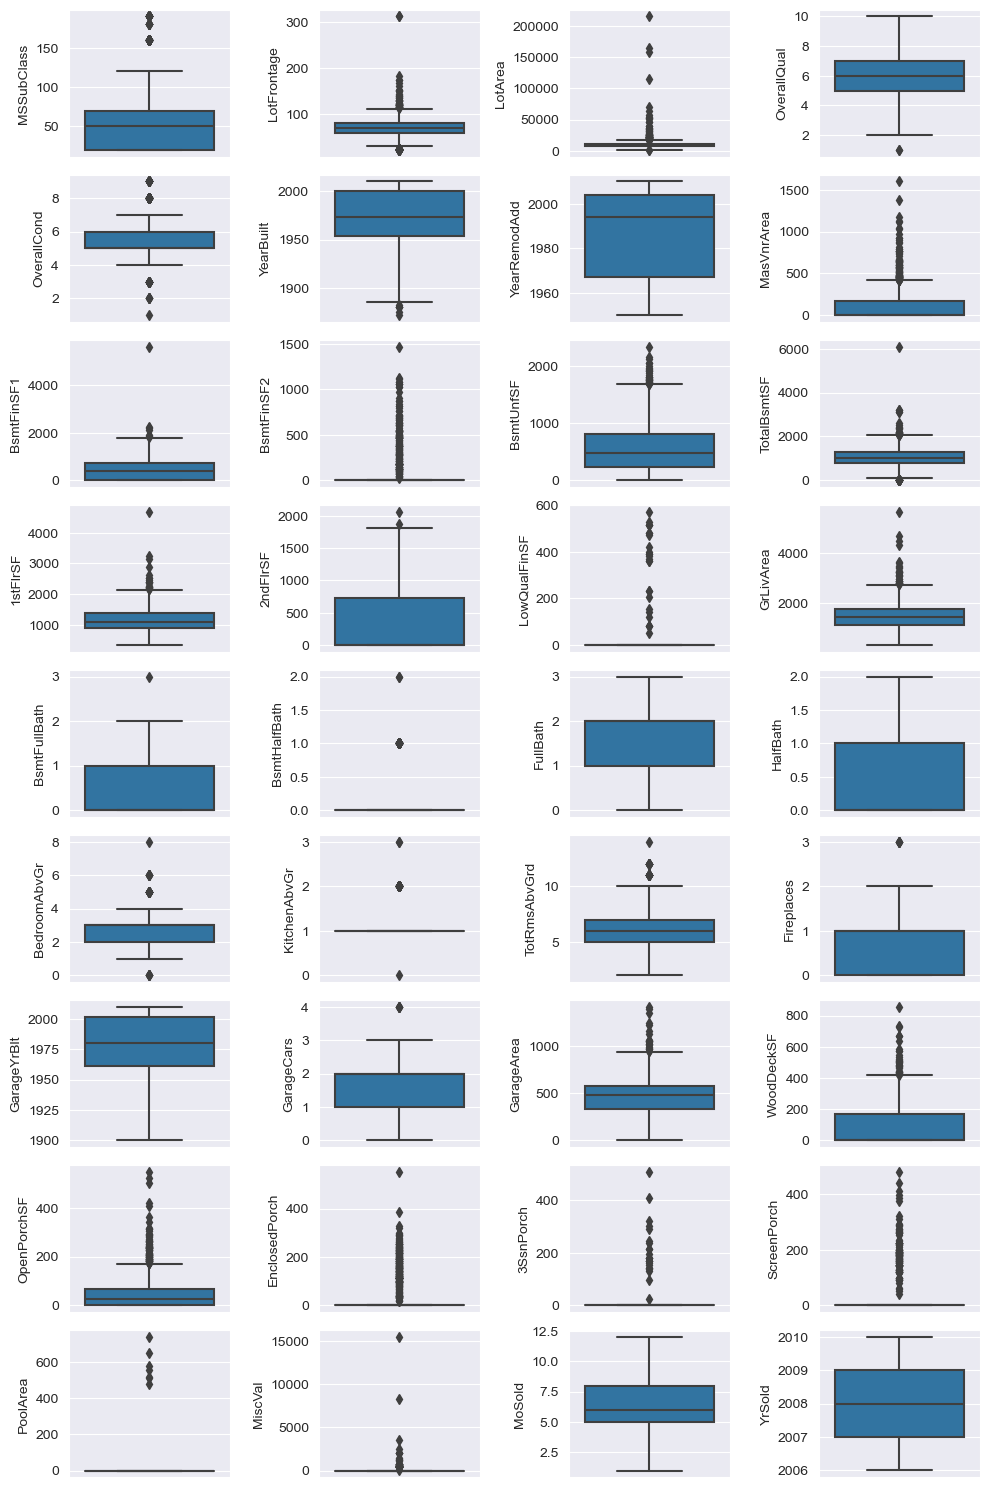

In [75]:
fig=plt.figure(figsize=(10,15))
for i in range(len(num_attribute.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=num_attribute.iloc[:,i])
plt.tight_layout()
plt.show()

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_11050/3615905648.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=housing.corr()
/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_11050/3615905648.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr,dtype=np.bool)


<Axes: >

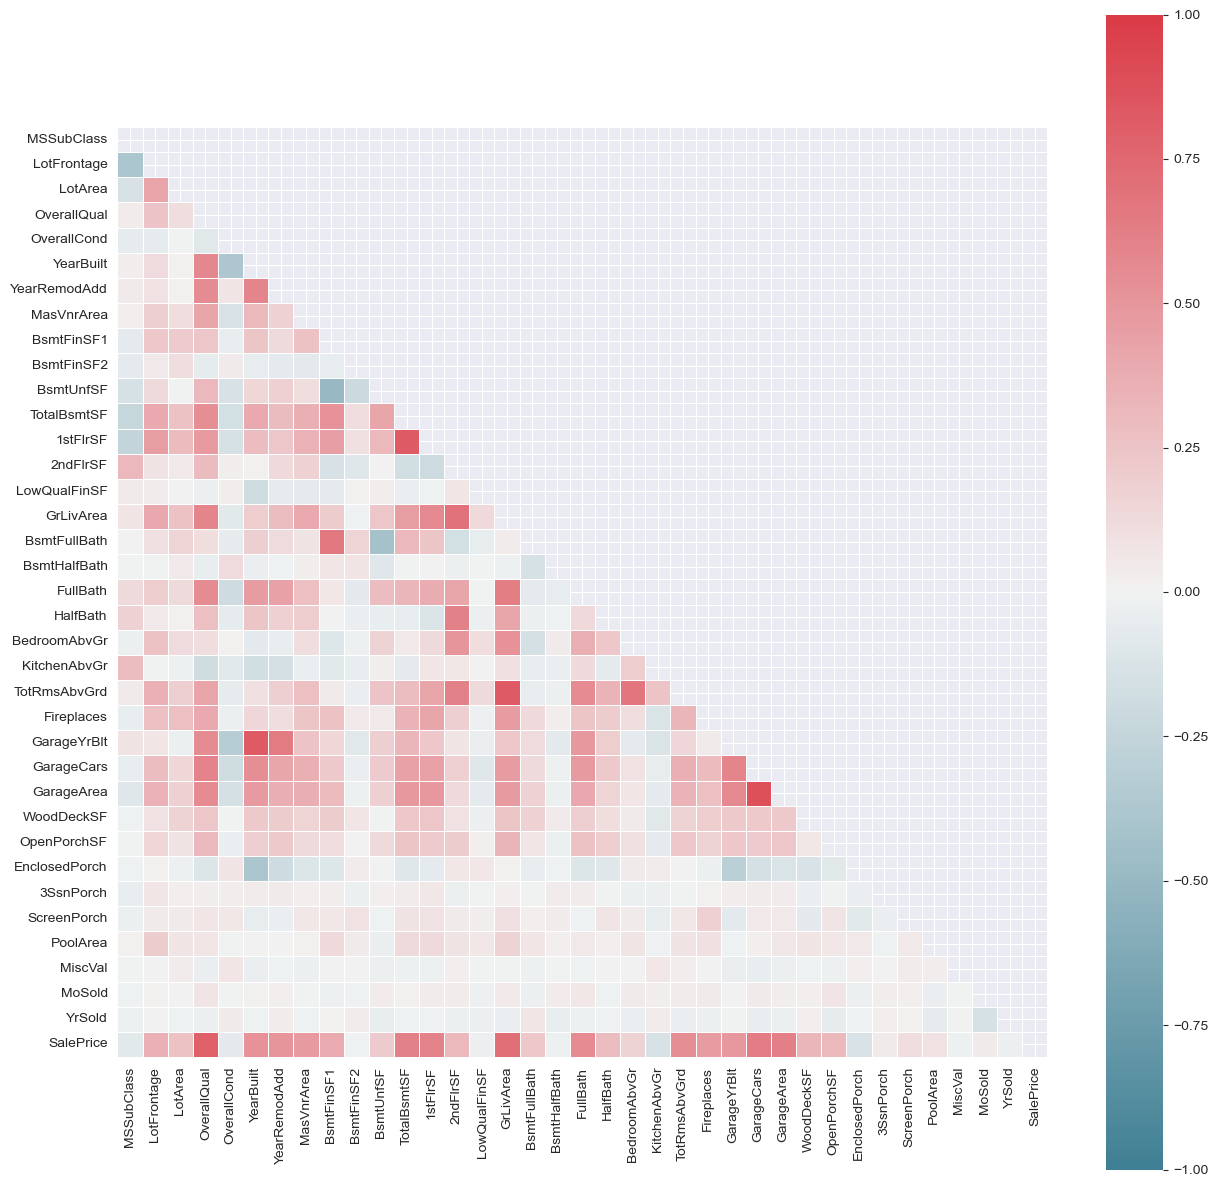

In [76]:
corr=housing.corr()
f,ax=plt.subplots(figsize=(15,15))
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,mask=mask,cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,vmin=-1.0,vmax=1.0, linewidths=.5)

In [77]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

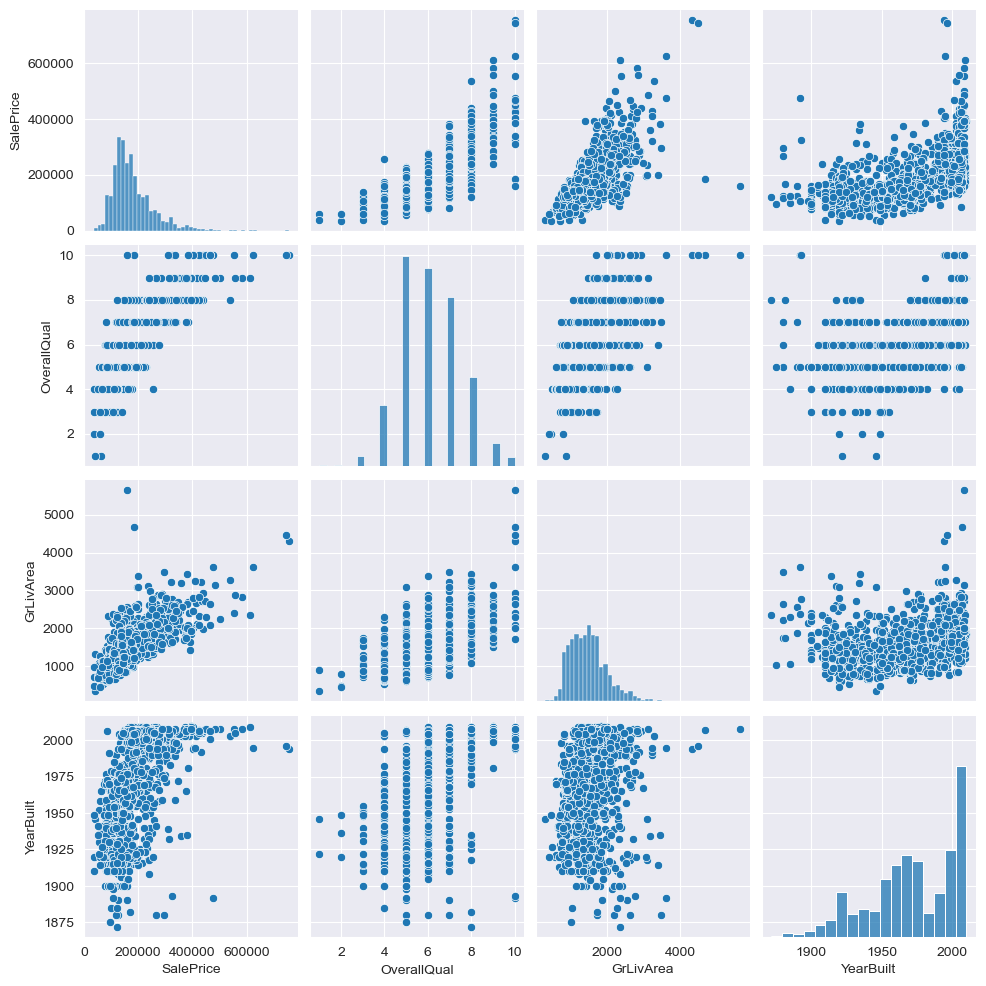

In [78]:
col=['SalePrice','OverallQual','GrLivArea','YearBuilt']
sns.pairplot(housing[col])

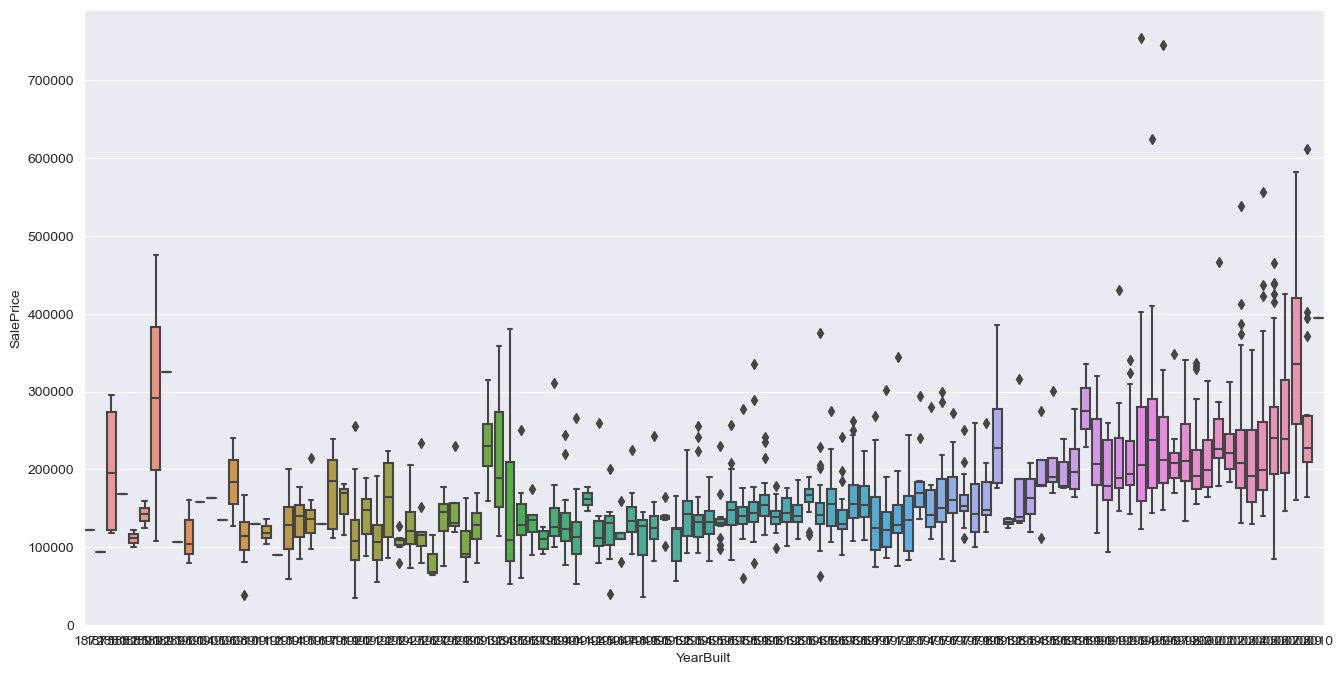

In [79]:
var='YearBuilt'
data=pd.concat([housing['SalePrice'],housing[var]],axis=1)
f,ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var,y="SalePrice",data=data)

In [80]:
# Only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
              for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs

,attribute pair,correlation
33,"(GarageArea, GarageCars)",0.882475
29,"(GarageYrBlt, YearBuilt)",0.825667
9,"(GrLivArea, TotRmsAbvGrd)",0.825489
37,"(1stFlrSF, TotalBsmtSF)",0.819530
6,"(OverallQual, SalePrice)",0.790982
36,"(GrLivArea, SalePrice)",0.708624
12,"(2ndFlrSF, GrLivArea)",0.687501
25,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
0,"(BsmtFinSF1, BsmtFullBath)",0.649212
7,"(GarageYrBlt, YearRemodAdd)",0.642277


In [81]:
cat_columns = housing.select_dtypes(include='object').columns
print(cat_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


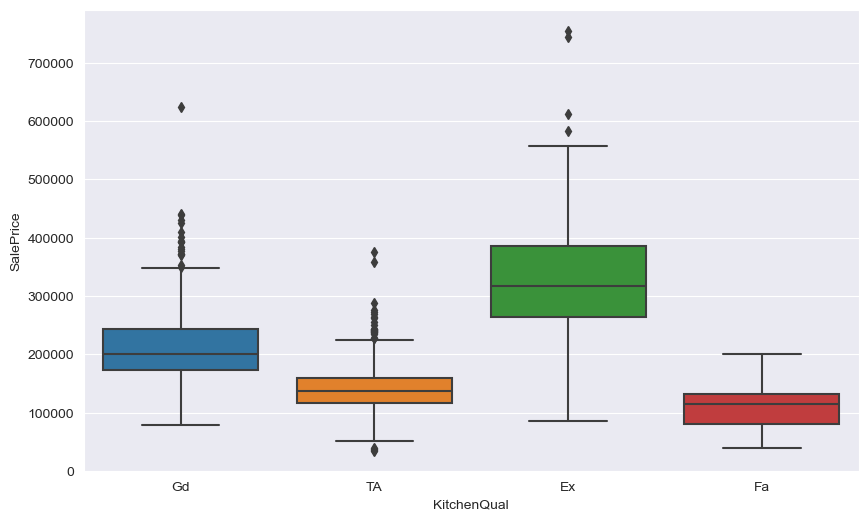

In [82]:
var = housing['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=housing.SalePrice, x=var)
plt.show()

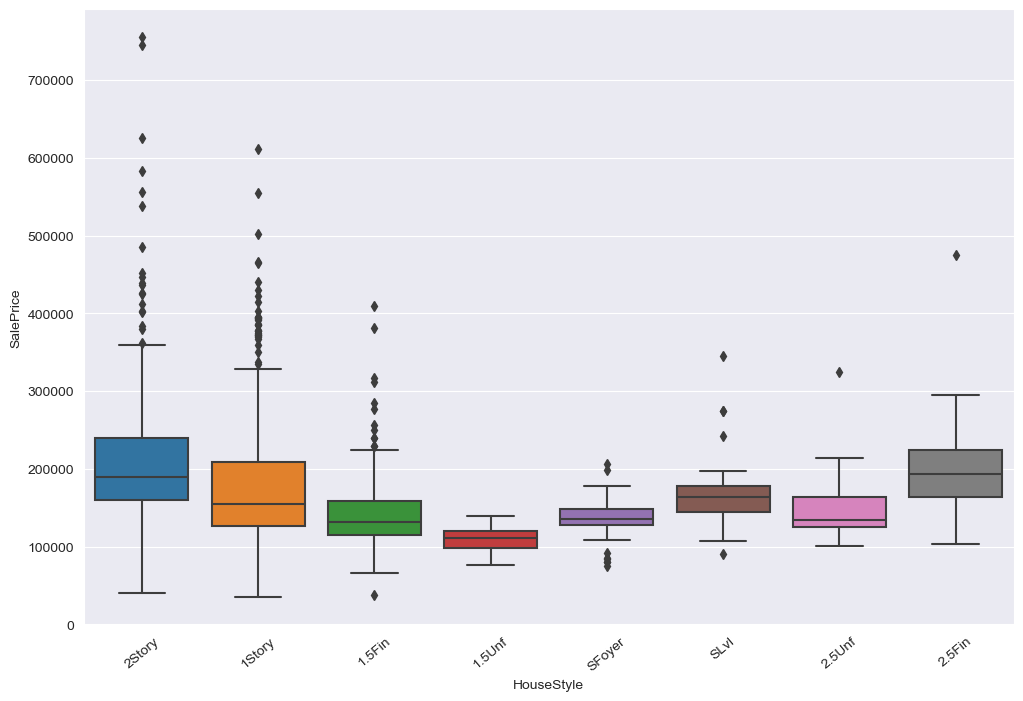

In [83]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=housing.SalePrice, x=housing.HouseStyle)
plt.xticks(rotation=40)
plt.show()

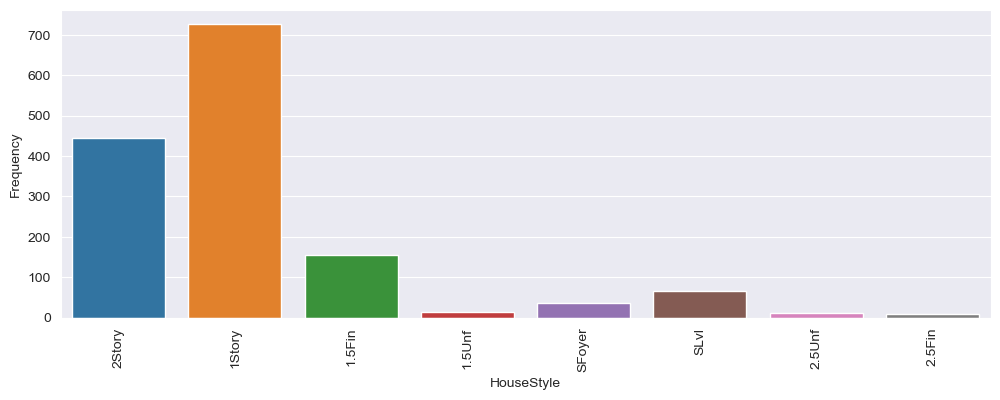

In [84]:
# Count of categories within HouseStyle attribute
fig = plt.figure(figsize=(12, 4))
sns.countplot(x='HouseStyle', data=housing)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

In [85]:
housing["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

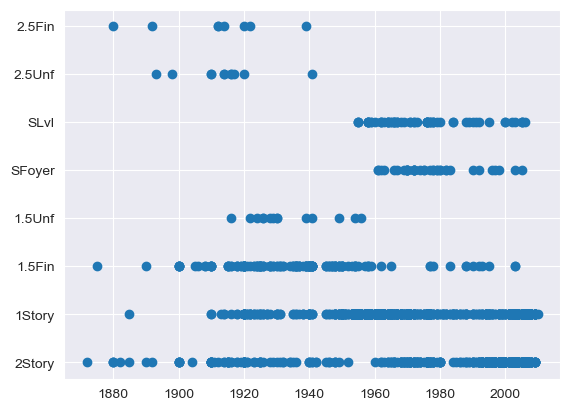

In [86]:
plt.scatter(housing['YearBuilt'],housing['HouseStyle'])

In [87]:
#PreProcessing

In [88]:
housing.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [89]:
# Imputing Missing Values

housing_processed = housing

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                      'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                      'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                      'MasVnrType']

# Replace missing values for categorical columns with None
for cat in cat_cols_fill_none:
    housing_processed[cat] = housing_processed[cat].fillna("None")

# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
housing_processed['LotFrontage'] = housing_processed.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# Garage: GarageYrBlt, GarageArea and GarageCars these are numerical columns, replace with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    housing_processed[col] = housing_processed[col].fillna(int(0))

# MasVnrArea : replace with zero
housing_processed['MasVnrArea'] = housing_processed['MasVnrArea'].fillna(int(0))

# Use the mode value
housing_processed['Electrical'] = housing_processed['Electrical'].fillna(housing_processed['Electrical']).mode()[0]

# There is no need of Utilities so let's just drop this column
housing_processed = housing_processed.drop(['Utilities'], axis=1)

# Get the count again to verify that we do not have any more missing values
housing_processed.isnull().apply(sum).max()

0

In [90]:
num_attributes = housing_processed.select_dtypes(exclude='object')

high_quant = housing_processed.quantile(.999)

for i in num_attributes.columns:
    housing_processed = housing_processed.drop(housing_processed[i][housing_processed[i]>high_quant[i]].index)

housing_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1422 non-null   int64  
 1   MSZoning       1422 non-null   object 
 2   LotFrontage    1422 non-null   float64
 3   LotArea        1422 non-null   int64  
 4   Street         1422 non-null   object 
 5   Alley          1422 non-null   object 
 6   LotShape       1422 non-null   object 
 7   LandContour    1422 non-null   object 
 8   LotConfig      1422 non-null   object 
 9   LandSlope      1422 non-null   object 
 10  Neighborhood   1422 non-null   object 
 11  Condition1     1422 non-null   object 
 12  Condition2     1422 non-null   object 
 13  BldgType       1422 non-null   object 
 14  HouseStyle     1422 non-null   object 
 15  OverallQual    1422 non-null   int64  
 16  OverallCond    1422 non-null   int64  
 17  YearBuilt      1422 non-null   int64  
 18  YearRemo

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_11050/2767556814.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_quant = housing_processed.quantile(.999)


In [91]:
#### Remove highly correlated features
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['MiscVal', 'MoSold', 'YrSold', 'BsmtFinSF2','BsmtHalfBath','MSSubClass',
                   'GarageArea', 'GarageYrBlt', '3SsnPorch']

housing_processed = housing_processed.drop(attributes_drop, axis=1)

In [92]:
#### Transforming Cat variables
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_processed_1hot = cat_encoder.fit_transform(housing_processed)
housing_processed_1hot

<1422x7333 sparse matrix of type '<class 'numpy.float64'>'
	with 99540 stored elements in Compressed Sparse Row format>

In [93]:
#DataTransformation

In [94]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Separate features and target variable
housing_X = housing_processed.drop("SalePrice", axis=1)
housing_y = housing_processed["SalePrice"].copy()

# Get the list of names for numerical and categorical attributes separately
num_attributes = housing_X.select_dtypes(exclude='object')
cat_attributes = housing_X.select_dtypes(include='object')

num_attribs = list(num_attributes)
cat_attribs = list(cat_attributes)

# Numerical Pipeline to impute any missing values with the median and scale attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [95]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])


# Description before applying transforms
print(housing_y.describe())

# Apply log-transform to SalePrice
housing_y_prepared  = np.log(housing_y)

# Run the transformation pipeline on all the other attributes
housing_X_prepared = full_pipeline.fit_transform(housing_X)

# Description before applying transforms
print(housing_y_prepared.describe())

housing_X_prepared

count      1422.000000
mean     178405.042897
std       74506.926127
min       35311.000000
25%      129600.000000
50%      161500.000000
75%      211750.000000
max      611657.000000
Name: SalePrice, dtype: float64
count    1422.000000
mean       12.014792
std         0.389594
min        10.471950
25%        11.772207
50%        11.992260
75%        12.263160
max        13.323927
Name: SalePrice, dtype: float64


<1422x281 sparse matrix of type '<class 'numpy.float64'>'
	with 98118 stored elements in Compressed Sparse Row format>

In [96]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing_X_prepared, housing_y_prepared, test_size=0.2, random_state=7)

In [97]:
# Import modules
from sklearn.linear_model import LinearRegression

# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
print("Accuracy%:", model.score(X_test, y_test)*100)

Accuracy%: 89.54568317175175


In [98]:
def inv_y(y):
    return np.exp(y)

In [99]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost

# Invert the log-transformed value
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collect RMSE for the different algorithms: "algorithm name + rmse"
rmse_compare = pd.Series()
rmse_compare.index.name = 'Model'

# Series to collect accuracy scores for the different algorithms: "algorithm name + score"
scores_compare = pd.Series()
scores_compare.index.name = 'Model'

# Model 1: Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_val_predictions = linear_model.predict(X_test)
linear_val_rmse = mean_squared_error(inv_y(linear_val_predictions), inv_y(y_test))
linear_val_rmse = np.sqrt(linear_val_rmse)
rmse_compare['LinearRegression'] = linear_val_rmse

lr_score = linear_model.score(X_test, y_test)*100
scores_compare['LinearRegression'] = lr_score

# Model 2: Decision Trees. Define the model. =============================
dtree_model = DecisionTreeRegressor(random_state=5)
dtree_model.fit(X_train, y_train)

dtree_val_predictions = dtree_model.predict(X_test)
dtree_val_rmse = mean_squared_error(inv_y(dtree_val_predictions), inv_y(y_test))
dtree_val_rmse = np.sqrt(dtree_val_rmse)
rmse_compare['DecisionTree'] = dtree_val_rmse

dtree_score = dtree_model.score(X_test, y_test)*100
scores_compare['DecisionTree'] = dtree_score

# Model 3: Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(X_train, y_train)

rf_val_predictions = rf_model.predict(X_test)
rf_val_rmse = mean_squared_error(inv_y(rf_val_predictions), inv_y(y_test))
rf_val_rmse = np.sqrt(rf_val_rmse)
rmse_compare['RandomForest'] = rf_val_rmse

rf_score = rf_model.score(X_test, y_test)*100
scores_compare['RandomForest'] = rf_score

# Model 4: Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05,
                                      max_depth=4, random_state=5)
gbr_model.fit(X_train, y_train)

gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_rmse = mean_squared_error(inv_y(gbr_val_predictions), inv_y(y_test))
gbr_val_rmse = np.sqrt(gbr_val_rmse)
rmse_compare['GradientBoosting'] = gbr_val_rmse

gbr_score = gbr_model.score(X_test, y_test)*100
scores_compare['GradientBoosting'] = gbr_score

/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_11050/3984621161.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rmse_compare = pd.Series()
/var/folders/3x/bz536h6929q9kwynkd0t0mzh0000gn/T/ipykernel_11050/3984621161.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  scores_compare = pd.Series()


In [100]:
print('RMSE values for different algorithms:')
rmse_compare.sort_values(ascending=True).round()

RMSE values for different algorithms:


Model
LinearRegression    24663.0
GradientBoosting    27219.0
RandomForest        30255.0
DecisionTree        39156.0
dtype: float64

In [101]:
print('Accuracy scores for different algorithms:')
scores_compare.sort_values(ascending = False).round(3)

Accuracy scores for different algorithms:


Model
GradientBoosting    89.568
LinearRegression    89.546
RandomForest        86.317
DecisionTree        73.726
dtype: float64

In [102]:
from sklearn.model_selection import cross_val_score

# Perform K fold cross-validation, where K=10
scores = cross_val_score(linear_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)

# Display results
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(linear_rmse_scores)

Scores: [0.11258893 0.13870331 0.10560818 0.12879735 0.10938525 0.11523265
 0.10957018 0.11721005 0.13331901 0.11522029]
Mean: 0.11856352029909993
Standard deviation: 0.010586916796202103


In [103]:
from sklearn.model_selection import GridSearchCV

# Define the parameters for exploration
param_grid = [
    {'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]},
    {'bootstrap': [False], 'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]},
]

# The model for which we are finding params values
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 20, 30, 40, 50, 100, 150],
                          'n_estimators': [10, 50, 100, 150]},
                         {'bootstrap': [False],
                          'max_features': [10, 20, 30, 40, 50, 100, 150],
                          'n_estimators': [10, 50, 100, 150]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [104]:
# Best values
grid_search.best_params_

# Model with best values
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=50, n_estimators=150)

In [105]:
rf_model_final = RandomForestRegressor(bootstrap=False,max_features=50, n_estimators=150, random_state=5)

rf_model_final.fit(X_train, y_train)
rf_final_val_predictions = rf_model_final.predict(X_test)

# Get RMSE
rf_final_val_rmse = mean_squared_error(inv_y(rf_final_val_predictions), inv_y(y_test))
np.sqrt(rf_final_val_rmse)

# Get Accuracy
rf_model_final.score(X_test, y_test)*100

87.76925332967403